50.データの入手・成形

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip ./NewsAggregatorDataset.zip

--2023-05-16 12:09:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip’

NewsAggregatorDatas 100%[===================>]  27.87M  25.3MB/s    in 1.1s    

2023-05-16 12:09:28 (25.3 MB/s) - ‘NewsAggregatorDataset.zip’ saved [29224203/29224203]

Archive:  ./NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("newsCorpora.csv", sep="\t", header=None,
                 names=["ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"])

# 情報源（PUBLISHER）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出
df = df[df["PUBLISHER"].isin(["Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"])] # .isin()：DataFrameの条件抽出
# カテゴリ名と記事見出しの列のみ抽出
df = df[["TITLE", "CATEGORY"]]

# 学習、検証、評価用データに分割
train, valid_test = train_test_split(df, test_size=0.2, shuffle=True)
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True)

# データをファイルに保存
train.to_csv("train.txt", sep="\t", index=False, header=None)
valid.to_csv("valid.txt", sep="\t", index=False, header=None)
test.to_csv("test.txt", sep="\t", index=False, header=None)

print("【train】")
print(train["CATEGORY"].value_counts(), "\n") # .value_counts()：要素数をカウント
print("【valid】")
print(valid["CATEGORY"].value_counts(), "\n")
print("【test】")
print(test["CATEGORY"].value_counts())

【train】
b    4504
e    4224
t    1219
m     725
Name: CATEGORY, dtype: int64 

【valid】
b    564
e    524
t    145
m    101
Name: CATEGORY, dtype: int64 

【test】
b    559
e    531
t    160
m     84
Name: CATEGORY, dtype: int64


51.特徴量抽出

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

def preprocess(text):
    text = text.lower() # 小文字化
    text = re.sub('[0-9]+', '0', text) # 数字を0に置換
    text = re.sub(r'\W+', ' ', text) # 記号を削除

    return text

# データの前処理
train["TITLE"] = train["TITLE"].map(lambda x: preprocess(x))
valid["TITLE"] = valid["TITLE"].map(lambda x: preprocess(x))
test["TITLE"] = test["TITLE"].map(lambda x: preprocess(x))

print(train.head())
print(valid.head())
print(test.head())

vectorizer = TfidfVectorizer()
vectorizer.fit(train["TITLE"])
vec_train = vectorizer.transform(train["TITLE"])
vec_valid = vectorizer.transform(valid["TITLE"])
vec_test = vectorizer.transform(test["TITLE"])

# Tf-idfをデータフレームに変換
df_vec_train = pd.DataFrame(vec_train.toarray(), columns=vectorizer.get_feature_names_out())
df_vec_valid = pd.DataFrame(vec_valid.toarray(), columns=vectorizer.get_feature_names_out())
df_vec_test = pd.DataFrame(vec_test.toarray(), columns=vectorizer.get_feature_names_out())

# データの保存
df_vec_train.to_csv('train.feature.txt', sep='\t', index=False)
df_vec_valid.to_csv('valid.feature.txt', sep='\t', index=False)
df_vec_test.to_csv('test.feature.txt', sep='\t', index=False)

df_vec_train

                                                    TITLE CATEGORY
141671  michelle obama to guest star on nashville alon...        e
103933  update 0 outkast goes back to 0s hip hop at co...        e
30931   netflix calls for stronger rules on handling o...        t
325030       zaki s review transformers age of extinction        e
177334  louis c k comedy louie returns for season 0 af...        e
                                                    TITLE CATEGORY
240515  euro slides on germany as spain bonds rise wit...        b
283366  ford shows why hybrids aren t nearly as effici...        t
226571  at t chief sets aside europe dream to shore up...        t
398021  forex dollar sits tight near six month high ah...        b
239604   that never happened miley cyrus denies that s...        e
                                                    TITLE CATEGORY
410248  fiat quarterly profit misses estimates on amer...        b
5250    virtu filing shines light on high frequency tr...     

,0b,0billion,0bn,0bntoyota,0c,0ct,0d,0dayfm,0ers,0f,...,zooey,zoosk,zpfa0mqti0qdrpfhqwjm,zuckerberg,zynga,zâ,œf,œlousyâ,œpiece,œwaist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


52.学習

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(df_vec_train, train["CATEGORY"])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

53.予測

In [ ]:
preds = model.predict(df_vec_valid)
print("各記事のラベル：", train["CATEGORY"].values)
print("各記事のカテゴリ予測：", preds)

preds = model.predict_proba(df_vec_valid) # .predict_proba()：予測確率を求める
print("予測確率：\n", preds)

各記事のラベル： ['e' 'e' 't' ... 'm' 'm' 'e']
各記事のカテゴリ予測： ['b' 'b' 'b' ... 'm' 'b' 'm']
予測確率：
 [[0.92733342 0.03664524 0.0143335  0.02168784]
 [0.42907322 0.31389152 0.08384798 0.17318727]
 [0.47037656 0.23628211 0.05235446 0.24098687]
 ...
 [0.01684235 0.02877248 0.89373062 0.06065455]
 [0.99463062 0.00138422 0.00234679 0.00163837]
 [0.2490947  0.24984781 0.29780631 0.20325117]]


54.正解率の計測

In [ ]:
from sklearn.metrics import accuracy_score

pred_train = model.predict(df_vec_train)
pred_test = model.predict(df_vec_test)

print("trainデータの正解率 : ", accuracy_score(train["CATEGORY"], pred_train))
print("testデータの正解率 : ", accuracy_score(test["CATEGORY"], pred_test))

trainデータの正解率 :  0.9462143928035982
testデータの正解率 :  0.8875562218890555


55.混同行列の作成

[[4419   49    3   33]
 [  15 4205    0    4]
 [  83  127  512    3]
 [ 144  111    2  962]]


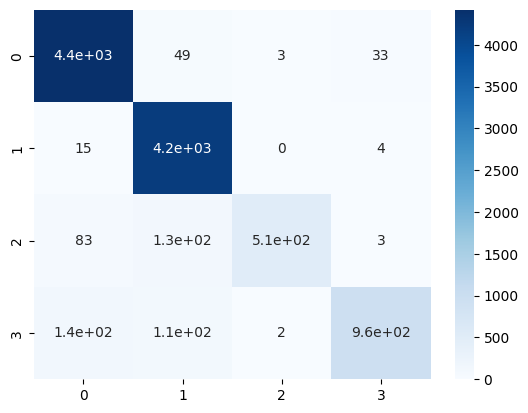

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_train = confusion_matrix(train['CATEGORY'], pred_train)
print(cm_train)
sns.heatmap(cm_train, annot=True, cmap='Blues')
plt.show()

[[522  25   2  10]
 [  7 522   0   2]
 [ 12  25  47   0]
 [ 39  28   0  93]]


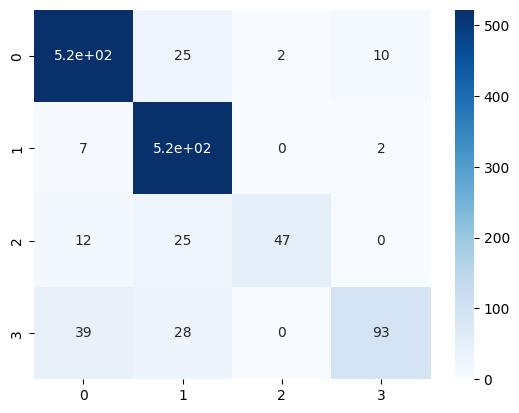

In [ ]:
cm_test = confusion_matrix(test['CATEGORY'], pred_test)
print(cm_test)
sns.heatmap(cm_test, annot=True, cmap='Blues')
plt.show()

56.適合率、再現率、F1スコアの計測

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test['CATEGORY'], pred_test))
# 多クラス分類では、マイクロ平均の適合率、再現率、F1スコアは正解率に等しくなる

              precision    recall  f1-score   support

           b       0.90      0.93      0.92       559
           e       0.87      0.98      0.92       531
           m       0.96      0.56      0.71        84
           t       0.89      0.58      0.70       160

    accuracy                           0.89      1334
   macro avg       0.90      0.76      0.81      1334
weighted avg       0.89      0.89      0.88      1334



57.特徴量の重みの確認

In [ ]:
import numpy as np

In [ ]:
features = df_vec_train.columns.values
for c, coef in zip(model.classes_, model.coef_): # .classes_:分類したカテゴリのラベルを取得, .coef_:モデルの特徴量ごとの重みを取得
    print("カテゴリ:", c)
    top_10 = pd.DataFrame(features[np.argsort(-coef)[:10]], columns=[f"重みの高い特徴量"], index=[i for i in range(1, 11)]) # np.argsort():引数に配列を指定し、昇順に並び替え、要素のindexを返す
    worst_10 = pd.DataFrame(features[np.argsort(coef)[:10]], columns=[f"重みの低い特徴量"], index=[i for i in range(1, 11)])
    display(pd.concat([top_10, worst_10], axis=1))
    print("-"*45)

カテゴリ: b


,重みの高い特徴量,重みの低い特徴量
1,stocks,the
2,fed,and
3,bank,ebola
4,china,her
5,ecb,she
6,euro,video
7,ukraine,apple
8,oil,microsoft
9,dollar,google
10,update,kardashian


---------------------------------------------
カテゴリ: e


,重みの高い特徴量,重みの低い特徴量
1,kardashian,update
2,chris,us
3,star,google
4,kim,china
5,she,says
6,miley,gm
7,her,facebook
8,cyrus,apple
9,paul,study
10,film,billion


---------------------------------------------
カテゴリ: m


,重みの高い特徴量,重みの低い特徴量
1,ebola,gm
2,cancer,apple
3,study,facebook
4,fda,ceo
5,drug,google
6,mers,sales
7,health,stocks
8,cases,climate
9,outbreak,at
10,could,deal


---------------------------------------------
カテゴリ: t


,重みの高い特徴量,重みの低い特徴量
1,google,stocks
2,apple,her
3,facebook,fed
4,microsoft,day
5,climate,cancer
6,gm,shares
7,tesla,drug
8,nasa,ecb
9,fcc,american
10,comcast,percent


---------------------------------------------


58.正則化パラメータの変更

In [ ]:
acc_train_list = []
acc_valid_list = []
acc_test_list = []

c_list = np.linspace(0.0001, 0.1, 10)
for c in c_list:
    model = LogisticRegression(C=c)
    model.fit(df_vec_train, train["CATEGORY"])

    preds_train = model.predict(df_vec_train)
    preds_valid = model.predict(df_vec_valid)
    preds_test = model.predict(df_vec_test)

    acc_train = accuracy_score(train['CATEGORY'], preds_train)
    acc_valid = accuracy_score(valid['CATEGORY'], preds_valid)
    acc_test = accuracy_score(test['CATEGORY'], preds_test)

    acc_train_list.append(acc_train)
    acc_valid_list.append(acc_valid)
    acc_test_list.append(acc_test)

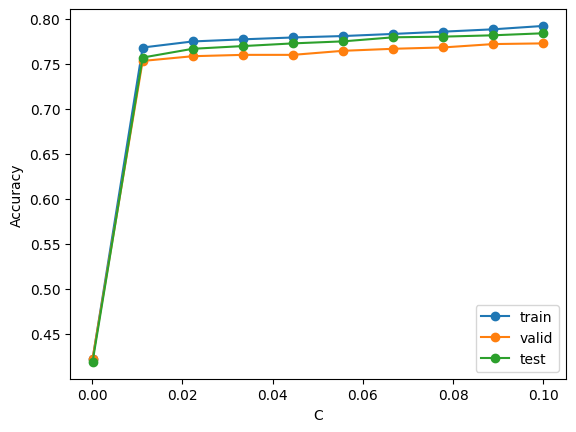

In [ ]:
#可視化
plt.plot(c_list, acc_train_list, label="train", marker="o")
plt.plot(c_list, acc_valid_list, label="valid", marker="o")
plt.plot(c_list, acc_test_list, label="test", marker="o")

plt.legend()
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.show()

59.ハイパーパラメータの探索

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {"C": [0.01, 0.1, 1],
          "solver": ["liblinear", "saga"]}

lr_gs_model = GridSearchCV(LogisticRegression(), params, cv=5, verbose=1)
lr_gs_model.fit(df_vec_train, train["CATEGORY"])

#最適なモデルを取得する
best_gs_model = lr_gs_model.best_estimator_
print("\ntrain_score: {:.2%}".format(best_gs_model.score(df_vec_train, train["CATEGORY"])))
print("valid_score: {:.2%}".format(best_gs_model.score(df_vec_valid, valid["CATEGORY"])))
print("test_score: {:.2%}".format(best_gs_model.score(df_vec_test, test["CATEGORY"])))

Fitting 5 folds for each of 6 candidates, totalling 30 fits

train_score: 94.63%
valid_score: 89.06%
test_score: 88.76%


In [ ]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import LabelEncoder

In [ ]:
params = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10]}

category_int = LabelEncoder()
train["CATEGORY"] = category_int.fit_transform(train["CATEGORY"])
valid["CATEGORY"] = category_int.fit_transform(valid["CATEGORY"])
test["CATEGORY"] = category_int.fit_transform(test["CATEGORY"])

lsvm_gs_model = GridSearchCV(LinearSVR(), params, cv=5, verbose=1)
lsvm_gs_model.fit(df_vec_train, train["CATEGORY"])

best_gs_model = lsvm_gs_model.best_estimator_
print("\ntrain_score: {:.2%}".format(best_gs_model.score(df_vec_train, train["CATEGORY"])))
print("valid_score: {:.2%}".format(best_gs_model.score(df_vec_valid, valid["CATEGORY"])))
print("test_score: {:.2%}".format(best_gs_model.score(df_vec_test, test["CATEGORY"])))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



train_score: 81.76%
valid_score: 57.72%
test_score: 62.02%
